<a href="https://colab.research.google.com/github/xei/polygon-partitioning-with-voronoi/blob/main/polygon_partitioning_with_voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2022 Hamidreza Hosseinkhani ([xei](https://github.com/xei)) under the terms of the MIT license.

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xei/polygon-partitioning-with-voronoi/blob/main/polygonـpartitioningـwithـvoronoi.ipynb)

Give a ⭐ if the notebook helped you!

[![GitHub stars](https://img.shields.io/github/stars/xei/polygon-partitioning-with-voronoi.svg?style=social&label=Star&maxAge=2592000)](https://github.com/xei/polygon-partitioning-with-voronoi/stargazers/)

The main idea of this notebook is inspired from [Here](http://blog.cleverelephant.ca/2018/06/polygon-splitting.html).

In [ ]:
!pip install geopandas
!pip install -U geovoronoi[plotting]

In [1]:
NUM_PARTITIONS = 10

In [2]:
import geopandas as gpd

world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
area_gdf = world_gdf[world_gdf.name == 'Iran']

area_gdf = area_gdf.to_crs(epsg=3395)    # convert to World Mercator CRS

area_gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
107,82021564,Asia,Iran,IRN,1459000.0,"POLYGON ((5406561.826 3472827.934, 5344957.295..."


In [ ]:
# import pandas as pd
# import geopandas as gpd

# CITY_ID = 5
 
# df = pd.read_csv("cities.csv")
# cp_union = gpd.GeoDataFrame(
#     df.loc[:, [c for c in df.columns if c != "polygon_wkt"]],
#     geometry=gpd.GeoSeries.from_wkt(df["polygon_wkt"]),
#     crs="epsg:3005",
# )

# area_gdf = cp_union[cp_union.id == CITY_ID]
# area_gdf

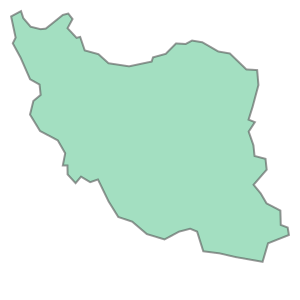

In [3]:
area_polygon = area_gdf.iloc[0].geometry
area_polygon

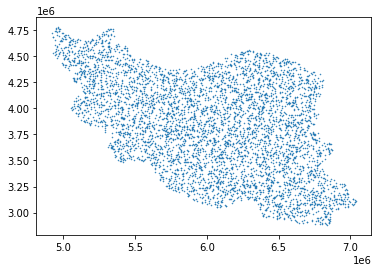

In [4]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import random

NUM_RAND_POINTS = 5000

x_min, y_min, x_max, y_max = area_polygon.bounds
random_points = []

i = 0
while i < NUM_RAND_POINTS:
  # point_rand = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(2,))
  # x_rand = point_rand[0]
  # y_rand = point_rand[1]
  x_rand = random.uniform(x_min, x_max)
  y_rand = random.uniform(y_min, y_max)
  point = Point(x_rand, y_rand)
  if area_polygon.contains(point):
    random_points.append([x_rand, y_rand])
    i += 1

plt.scatter(*zip(*random_points), marker='.', s=1)

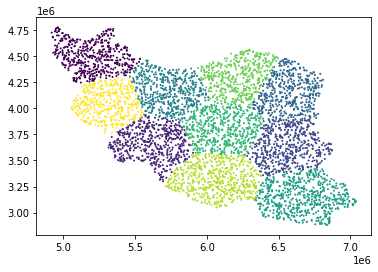

In [5]:
import numpy as np
from sklearn.cluster import KMeans

x_kmeans = np.array(random_points)
kmeans = KMeans(n_clusters=NUM_PARTITIONS, random_state=0).fit(x_kmeans)

y_kmeans = kmeans.predict(x_kmeans)
plt.scatter(x_kmeans[:, 0], x_kmeans[:, 1], c=y_kmeans, s=1, cmap='viridis')

In [6]:
from geovoronoi import voronoi_regions_from_coords

seeds = [Point(x, y) for x, y in kmeans.cluster_centers_]
region_polys, region_pts = voronoi_regions_from_coords(seeds, area_polygon)

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


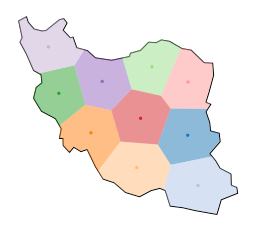

In [7]:
import matplotlib.pyplot as plt
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax,
                                       area_polygon,
                                       region_polys,
                                       seeds,
                                       region_pts)

plt.show()

In [8]:
for region_id, region_poly in region_polys.items():
  print(region_poly)

POLYGON ((6399850.7186242435 3896104.474309653, 6755034.454638977 3894232.798913535, 6738845.368152102 3869559.477970217, 6775311.062334214 3764589.47521117, 6784026.24243926 3681779.830415094, 6868336.261990138 3659887.610501935, 6877454.123684198 3576656.8913565064, 6776490.344130606 3460368.6649417793, 6802675.122978362 3428546.6662255414, 6399829.092529252 3346314.692346582, 6273227.24165095 3544919.54076793, 6399850.7186242435 3896104.474309653))
POLYGON ((6876412.904146897 3316918.789104699, 6982830.142934538 3261522.582121674, 6985902.02819929 3151248.7285865424, 7039165.297237332 3131077.7369834334, 7048375.200437453 3073855.289005573, 6887803.040521812 3009947.1080777873, 6868472.213197003 2944189.229977107, 6845855.124135005 2867252.4408505308, 6636437.687472194 2904202.3384811706, 6515057.951355686 2932389.2217664323, 6389432.800772168 2948351.3647158877, 6341956.641427639 3099867.092283847, 6330140.722971719 3104753.007024872, 6399829.092529252 3346314.692346582, 6802675.12